# Time Series Analysis

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd

## Load Data Set

In [2]:


bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame
df['year'] = df['year'].map({0: 2011, 1: 2012})
df['day'] = (df.groupby(['year', 'month']).cumcount() // 24) + 1
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
#df = df.set_index('datetime')


df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count,day,datetime
0,spring,2011,1,0,False,6,False,clear,9.84,14.395,0.81,0.0,16,1,2011-01-01 00:00:00
1,spring,2011,1,1,False,6,False,clear,9.02,13.635,0.80,0.0,40,1,2011-01-01 01:00:00
2,spring,2011,1,2,False,6,False,clear,9.02,13.635,0.80,0.0,32,1,2011-01-01 02:00:00
3,spring,2011,1,3,False,6,False,clear,9.84,14.395,0.75,0.0,13,1,2011-01-01 03:00:00
4,spring,2011,1,4,False,6,False,clear,9.84,14.395,0.75,0.0,1,1,2011-01-01 04:00:00


## Plot Data

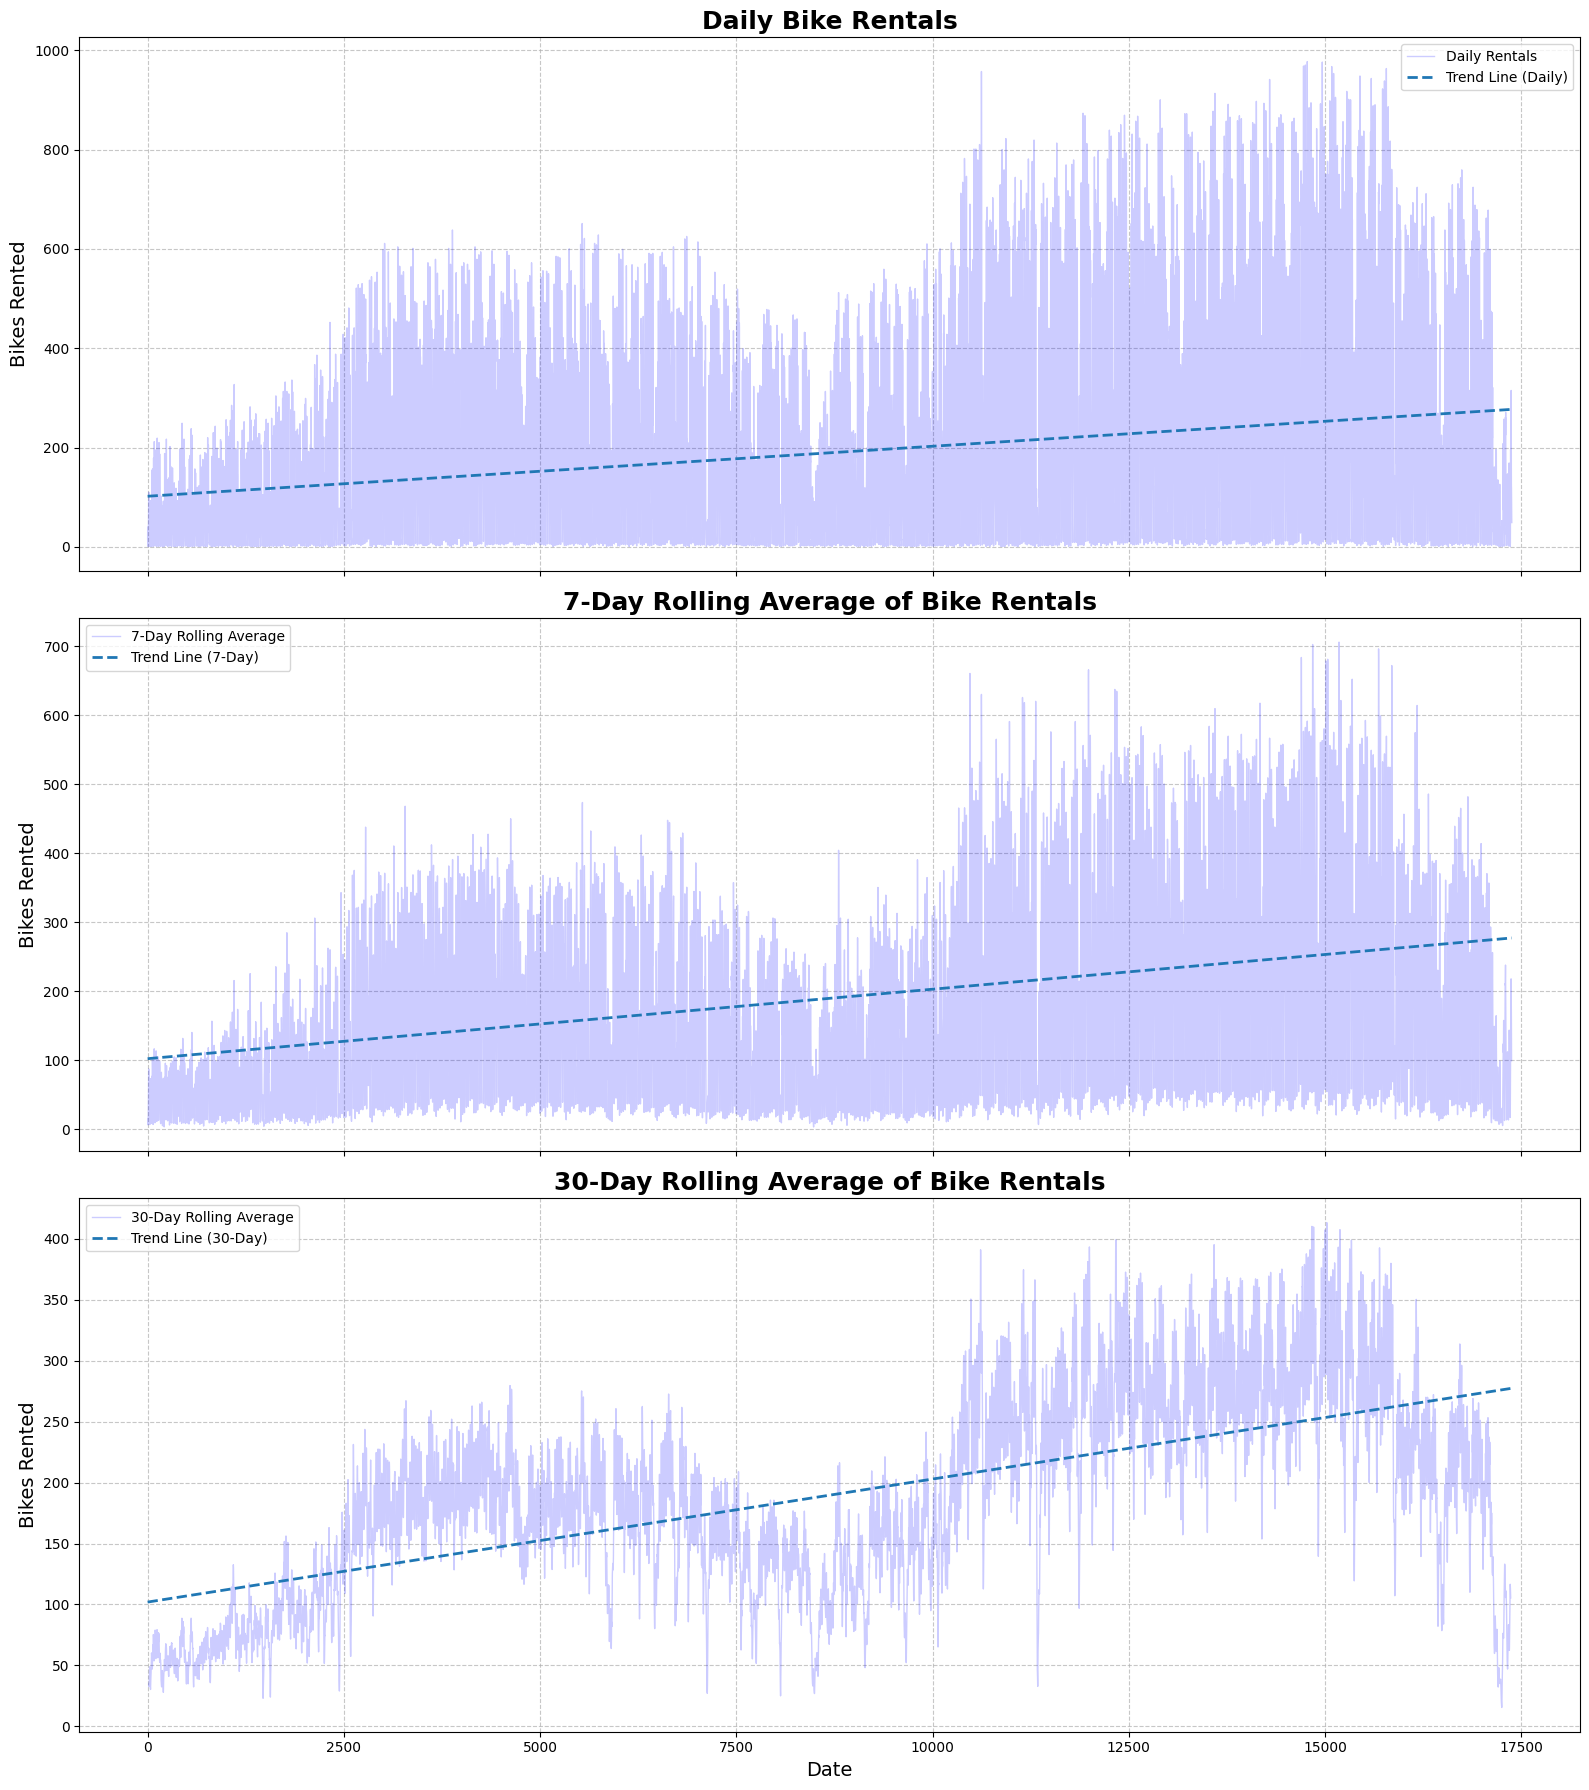

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create 7-day and 30-day rolling averages
rolling_7d = df['count'].rolling(window=7, center=True).mean()
rolling_30d = df['count'].rolling(window=30, center=True).mean()

# Prepare trendlines for all three
x = np.arange(len(df))

# Trendline for daily rentals
coef_daily = np.polyfit(x, df['count'].values, 1)
trend_daily = np.polyval(coef_daily, x)

# Trendline for 7-day rolling average
mask_7d = ~np.isnan(rolling_7d.values)
coef_7d = np.polyfit(x[mask_7d], rolling_7d.values[mask_7d], 1)
trend_7d = np.polyval(coef_7d, x)

# Trendline for 30-day rolling average
mask_30d = ~np.isnan(rolling_30d.values)
coef_30d = np.polyfit(x[mask_30d], rolling_30d.values[mask_30d], 1)
trend_30d = np.polyval(coef_30d, x)

# Create three subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 18), sharex=True)

# --- First Plot: Daily Rentals ---
axes[0].plot(df.index, df['count'], label='Daily Rentals', linewidth=1, color="blue", alpha=0.2)
axes[0].plot(df.index, trend_daily, linestyle='--', label='Trend Line (Daily)', linewidth=2)
axes[0].set_title('Daily Bike Rentals', fontsize=18, fontweight='bold')
axes[0].set_ylabel('Bikes Rented', fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)

# --- Second Plot: 7-Day Rolling Average ---
axes[1].plot(df.index, rolling_7d, label='7-Day Rolling Average', linewidth=1, color="blue", alpha=0.2)
axes[1].plot(df.index, trend_7d, linestyle='--', label='Trend Line (7-Day)', linewidth=2)
axes[1].set_title('7-Day Rolling Average of Bike Rentals', fontsize=18, fontweight='bold')
axes[1].set_ylabel('Bikes Rented', fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.7)

# --- Third Plot: 30-Day Rolling Average ---
axes[2].plot(df.index, rolling_30d, label='30-Day Rolling Average', linewidth=1, color="blue", alpha=0.2)
axes[2].plot(df.index, trend_30d, linestyle='--', label='Trend Line (30-Day)', linewidth=2)
axes[2].set_title('30-Day Rolling Average of Bike Rentals', fontsize=18, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=14)
axes[2].set_ylabel('Bikes Rented', fontsize=14)
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.7)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


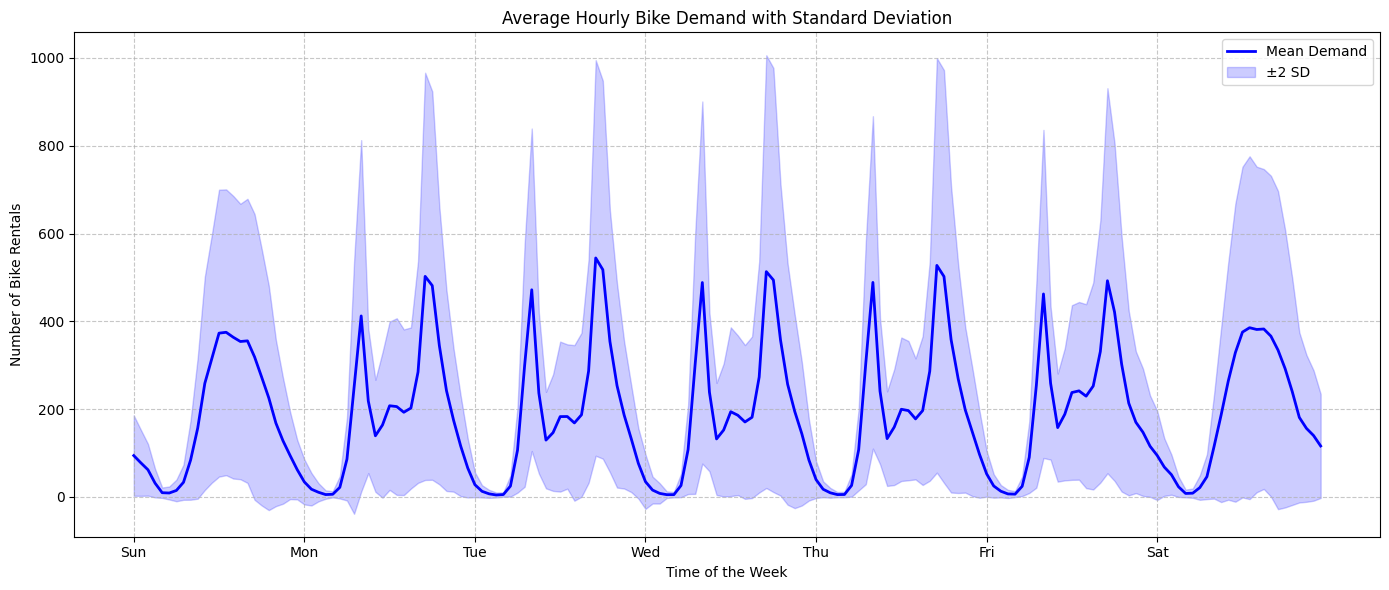

In [4]:
# Calculate mean (average) demand
average_week_demand = df.groupby(["weekday", "hour"])["count"].mean()

# Calculate standard deviation (SD) of demand
std_week_demand = df.groupby(["weekday", "hour"])["count"].std()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the average demand (mean)
average_week_demand.plot(ax=ax, label="Mean Demand", color="blue", linewidth=2)

# Calculate the upper and lower bounds for 95.5% (mean ± 2 * SD)
upper_bound = average_week_demand + 2 *  std_week_demand
lower_bound = average_week_demand - 2 * std_week_demand

# Fill the area between (mean ± SD)
ax.fill_between(
    range(len(average_week_demand)),
    lower_bound,
    upper_bound,
    color="blue",
    alpha=0.2,
    label="±2 SD"
)

# Customize the plot
ax.set(
    title="Average Hourly Bike Demand with Standard Deviation",
    xlabel="Time of the Week",
    ylabel="Number of Bike Rentals",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
)

ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


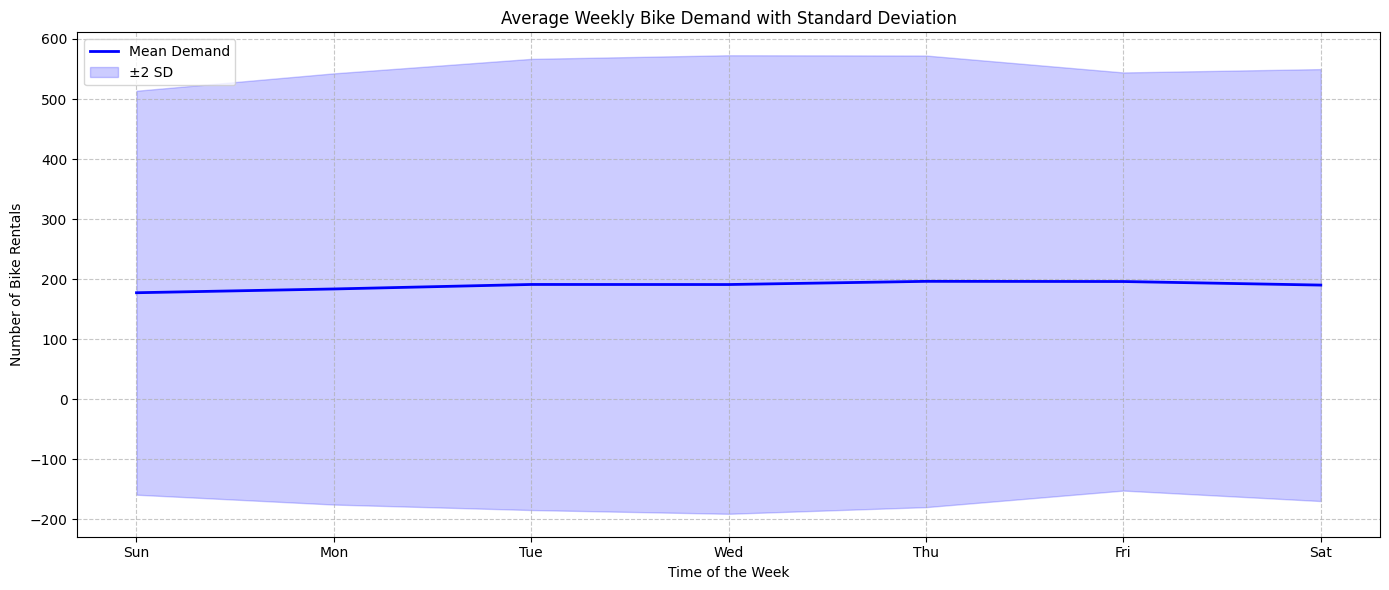

In [5]:
# Calculate mean (average) demand
average_weekly_demand = df.groupby(["weekday"])["count"].mean()

# Calculate standard deviation (SD) of demand
std_weekly_demand = df.groupby(["weekday"])["count"].std()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the average demand (mean)
average_weekly_demand.plot(ax=ax, label="Mean Demand", color="blue", linewidth=2)

# Calculate the upper and lower bounds for 95.5% (mean ± 2 * SD)
upper_bound = average_weekly_demand + 2 * std_weekly_demand
lower_bound = average_weekly_demand - 2 * std_weekly_demand

# Fill the area between (mean ± SD)
ax.fill_between(
    range(len(average_weekly_demand)),
    lower_bound,
    upper_bound,
    color="blue",
    alpha=0.2,
    label="±2 SD"
)

# Customize the plot
ax.set(
    title="Average Weekly Bike Demand with Standard Deviation",
    xlabel="Time of the Week",
    ylabel="Number of Bike Rentals",
    xticks=[i for i in range(7)],
   xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
)

ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


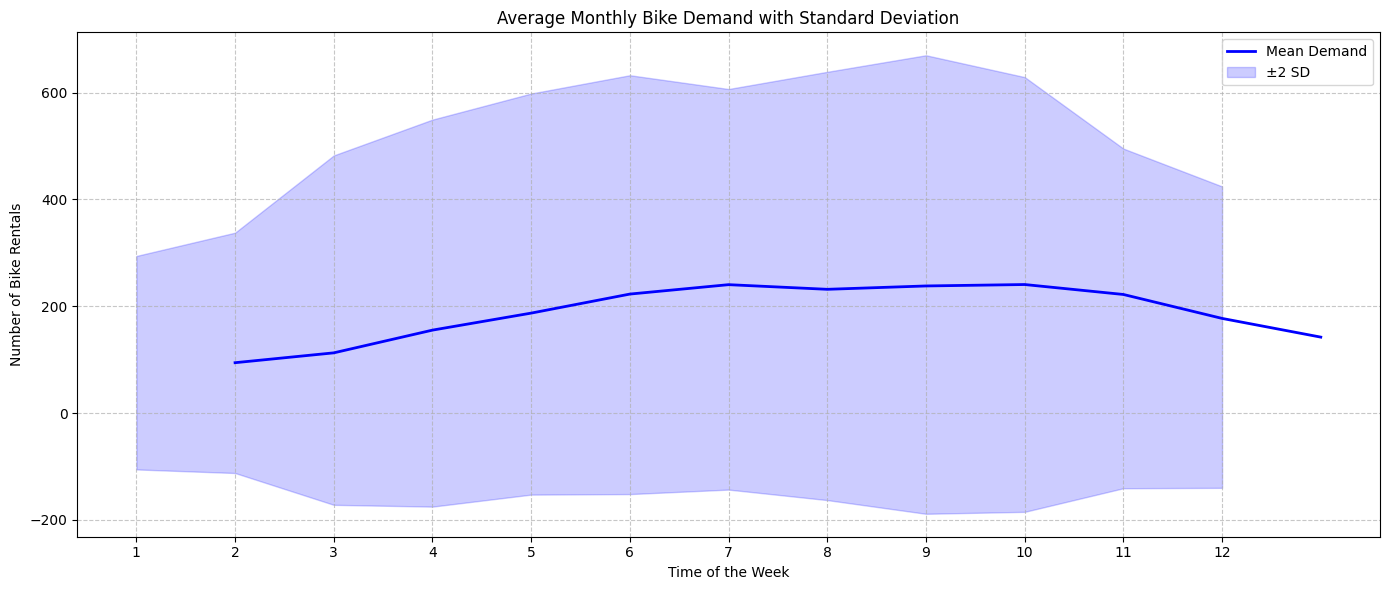

In [6]:
# Calculate mean (average) demand
average_month_demand = df.groupby(["month"])["count"].mean()

# Calculate standard deviation (SD) of demand
std_month_demand = df.groupby(["month"])["count"].std()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the average demand (mean)
average_month_demand.plot(ax=ax, label="Mean Demand", color="blue", linewidth=2)

# Calculate the upper and lower bounds for 95.5% (mean ± 2 * SD)
upper_bound = average_month_demand + 2 *  std_month_demand
lower_bound = average_month_demand - 2 * std_month_demand

# Fill the area between (mean ± SD)
ax.fill_between(
    range(len(average_month_demand)),
    lower_bound,
    upper_bound,
    color="blue",
    alpha=0.2,
    label="±2 SD"
)

# Customize the plot
ax.set(
    title="Average Monthly Bike Demand with Standard Deviation",
    xlabel="Time of the Week",
    ylabel="Number of Bike Rentals",
    xticks=[i for i in range(12)],
    xticklabels=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
)

ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()